In [16]:
import numpy as np
import cv2
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
pwd = os.getcwd()

## Image Segmentation Using Red Channel Thresholds

In [18]:
path_red = pwd+"/Red" # Path to Red Channel Folder
path_red

'C:\\Users\\ACER\\Documents\\Saquib Sir\\Thresholding_updated\\Thresholding/Red'

In [19]:
# Extract all background reduced images paths with "_saved_bgr.png" extension
images = glob.glob(path_red+"/BGR/*_saved_bgr.png")


In [20]:
th = pd.read_csv(pwd+"/threshold_red.csv") # Load Thresholds for Red Channel
th

,Unnamed: 0,min,max,Layer
0,Red,124.0,128.0,Background
1,Red,111.0,118.0,Monolayer
2,Red,103.0,110.0,Bilayer
3,Red,93.0,103.0,Trilayer


In [21]:
mono_min, mono_max = th.iloc[1]['min'], th.iloc[1]['max'] # Range for monolayer
bi_min, bi_max = th.iloc[2]['min'], th.iloc[2]['max']     # Range for bilayer
tri_min, tri_max = th.iloc[3]['min'], th.iloc[3]['max']   # Range for trilayer

In [22]:
# IMAGE SEGMENTATION FUNCTION
def detect(img: np.ndarray):
    # define layer color [r, g, b]
    img_seg = img.copy()
    layer = {
        'mono': [201, 255, 52],
        'bi': [241, 183, 23],
        'tri': [220, 110, 85]
    }
    red_channel = img_seg[:, :, 0] # 0 -> Red, 1 -> Green, 2 -> Blue
    row, col = red_channel.shape
    for r in range(row):
        for c in range(col):
            pixel_val = red_channel[r, c] # extract pixel value
            # identify which layer it is using threshold
            if mono_min <= pixel_val <= mono_max: 
                for i in range(3): img_seg[r, c, i] = layer['mono'][i]  # replace rgb values to monolayer color rgb
            if bi_min <= pixel_val <= bi_max:
                for i in range(3): img_seg[r, c, i] = layer['bi'][i]    # replace rgb values to bilayer color rgb
            if tri_min <= pixel_val <= tri_max:
                for i in range(3): img_seg[r, c, i] = layer['tri'][i]   # replace rgb values to trilayer color rgb

    return img_seg

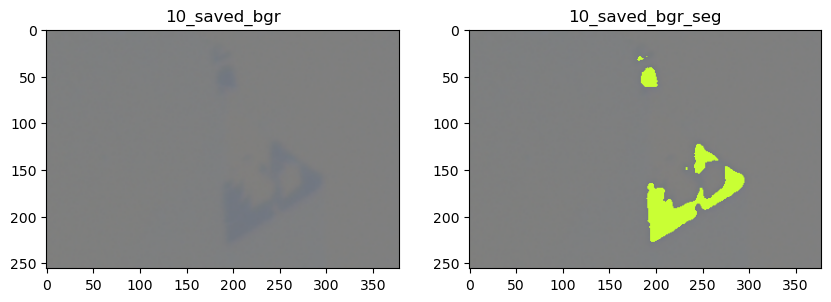

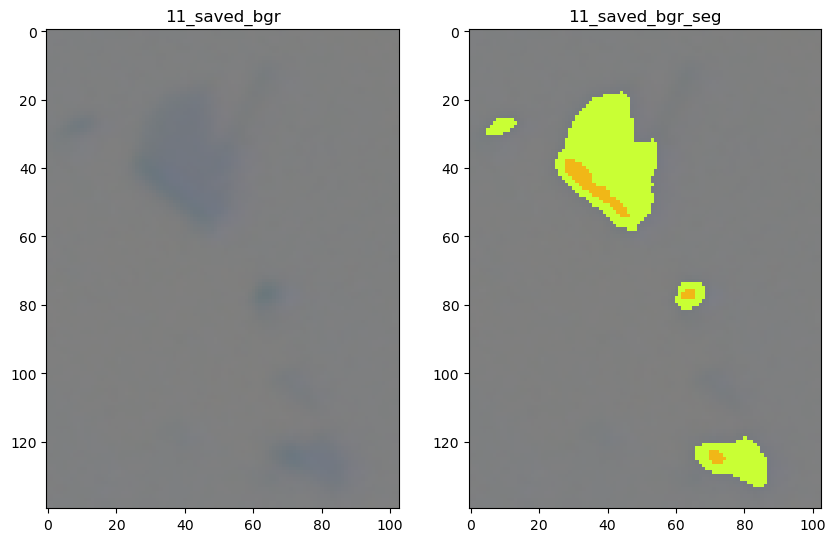

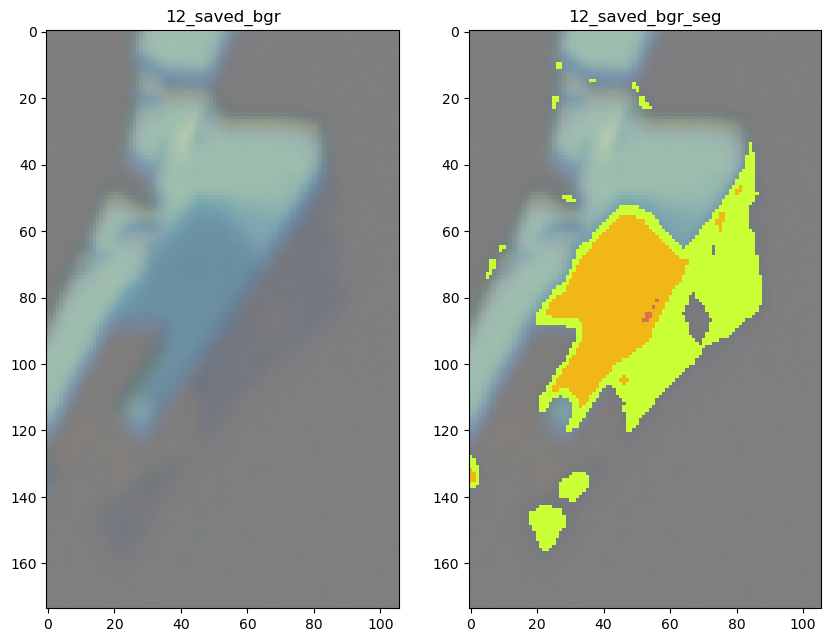

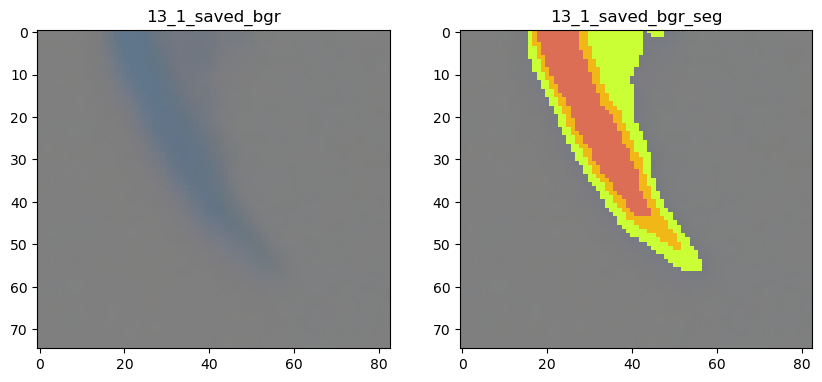

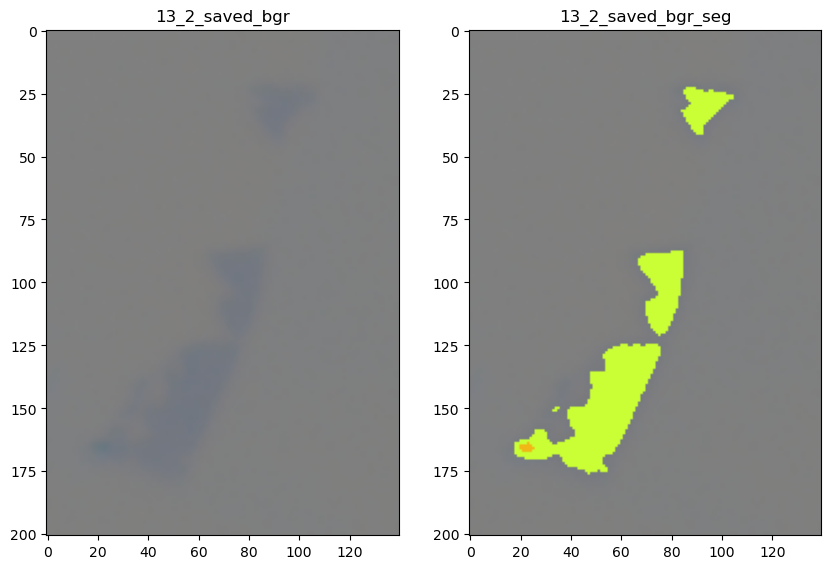

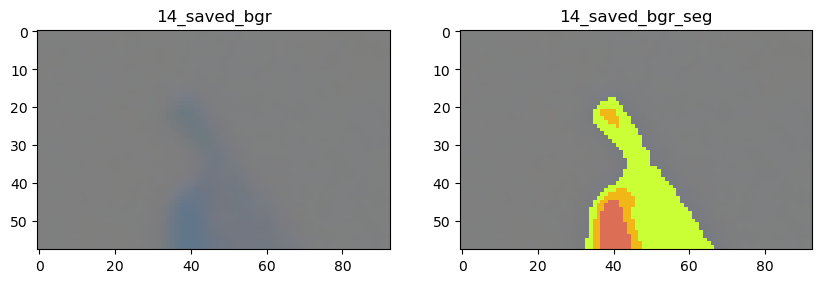

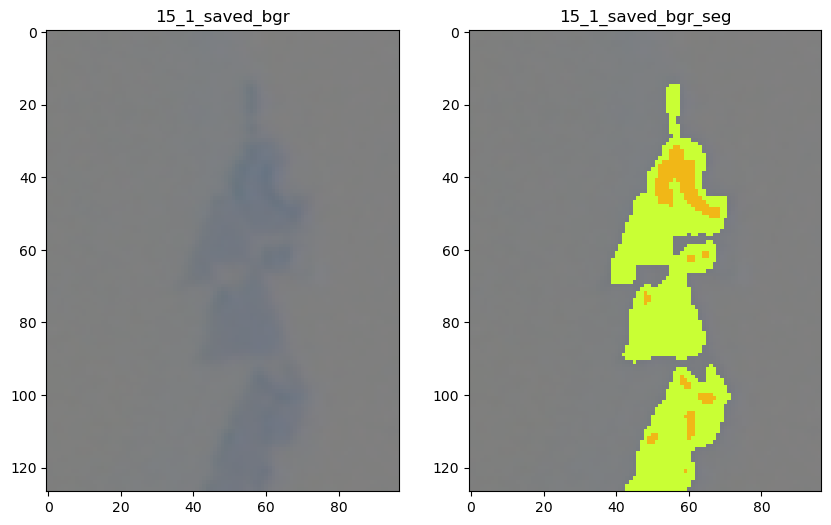

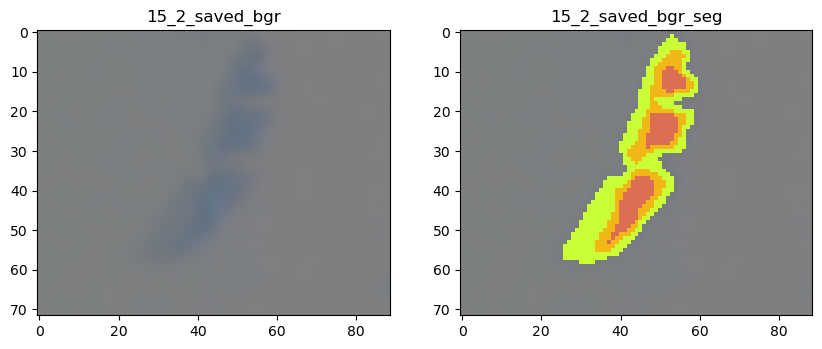

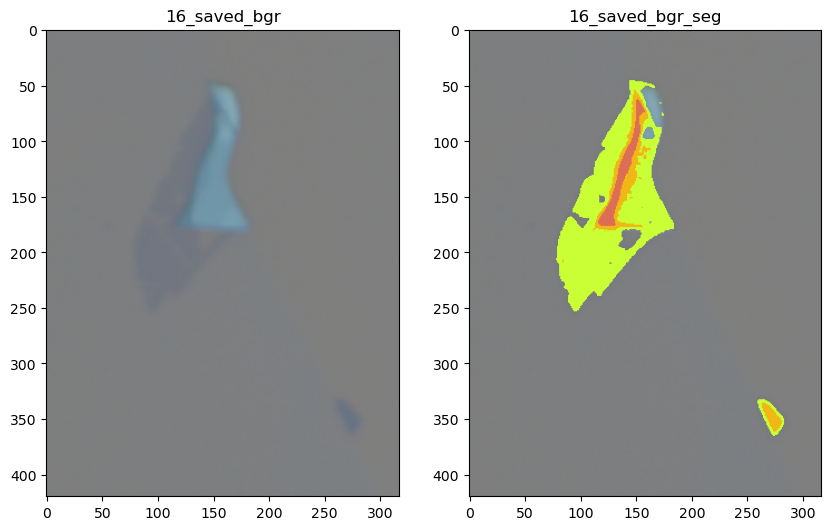

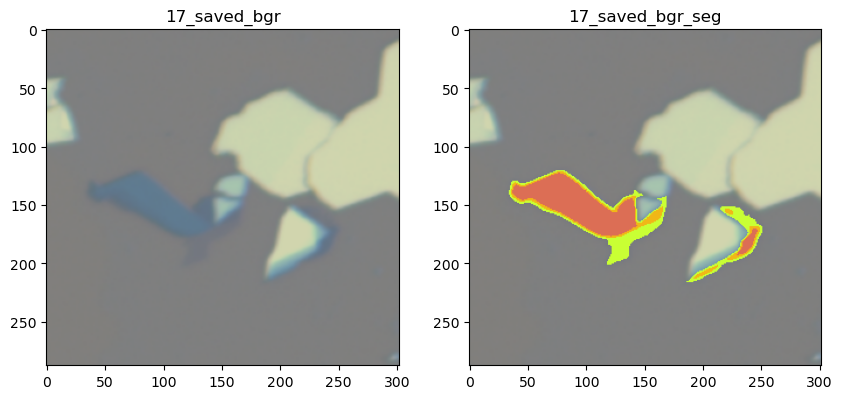

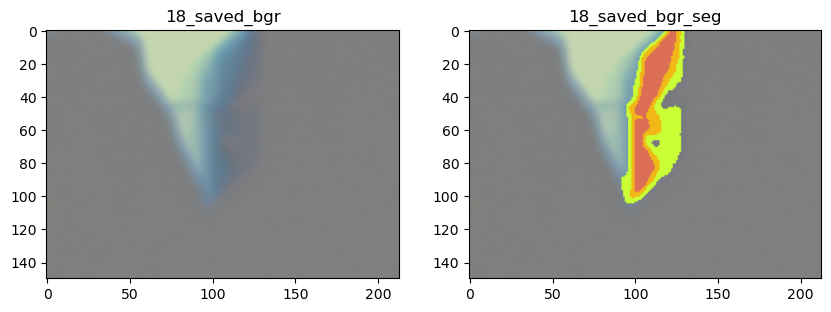

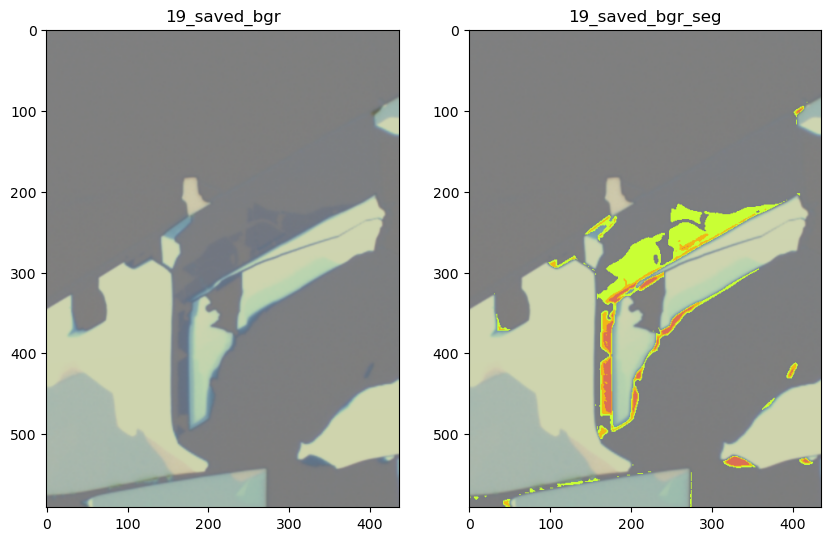

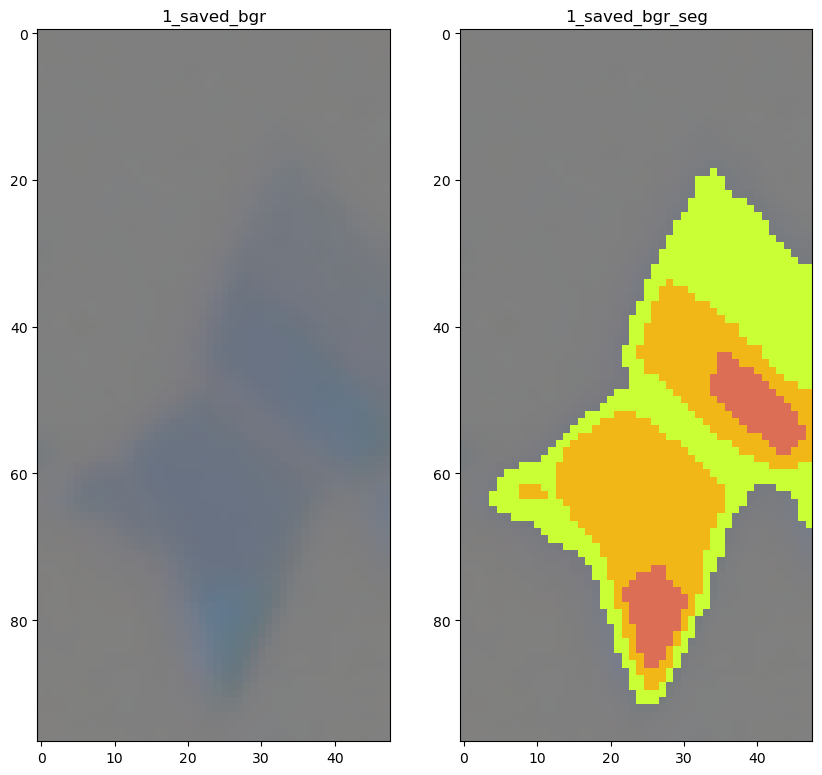

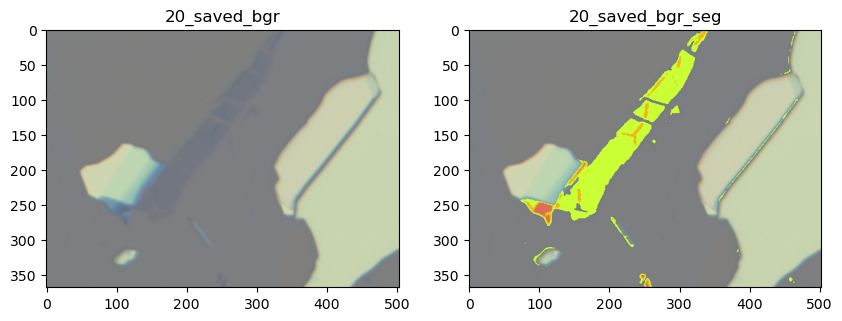

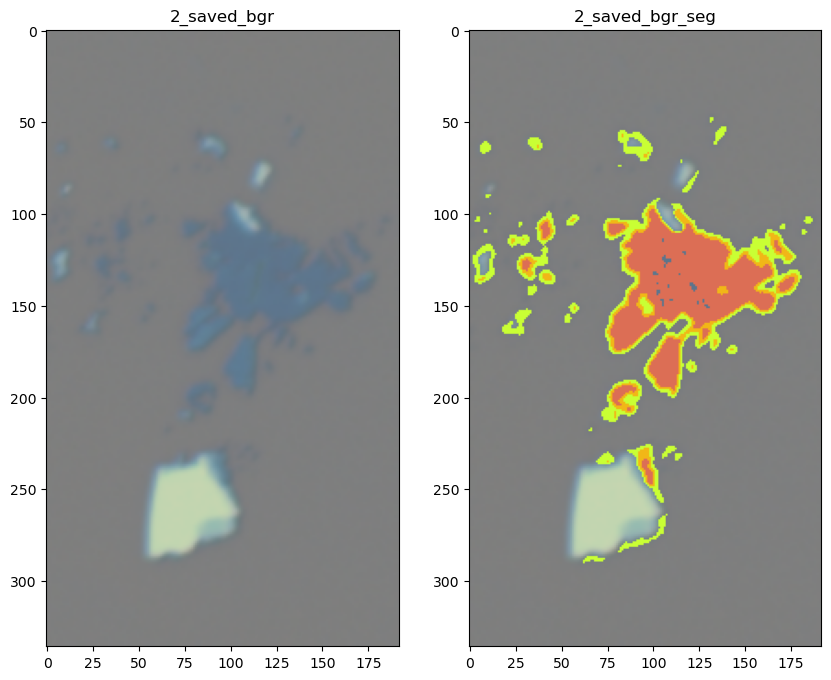

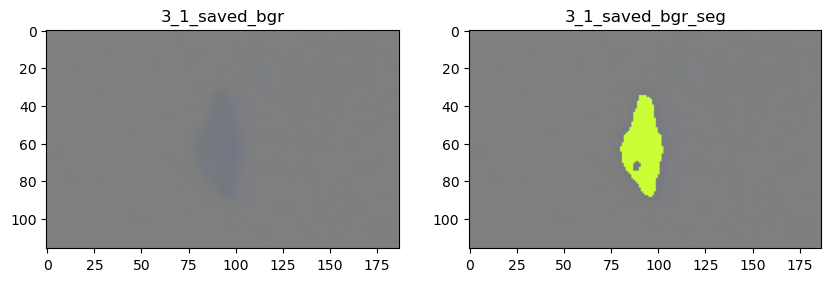

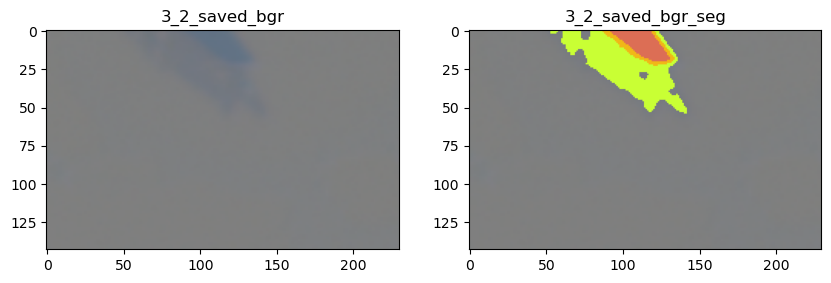

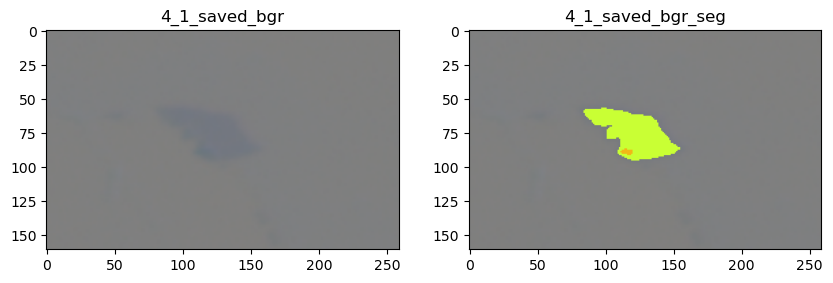

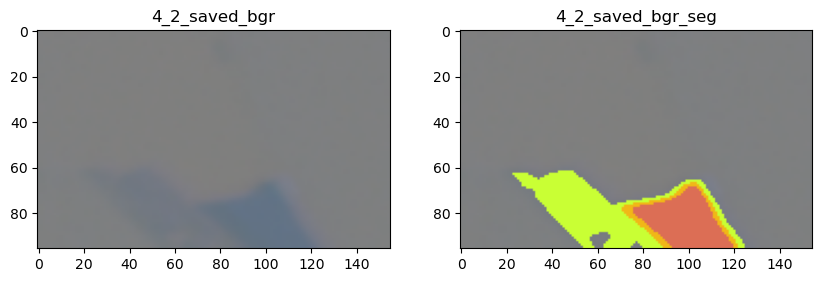

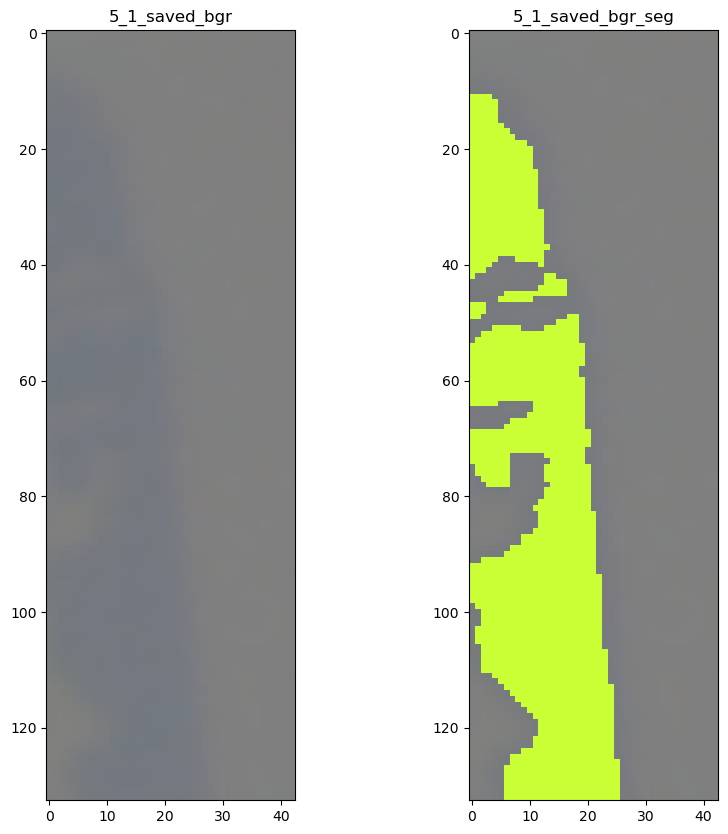

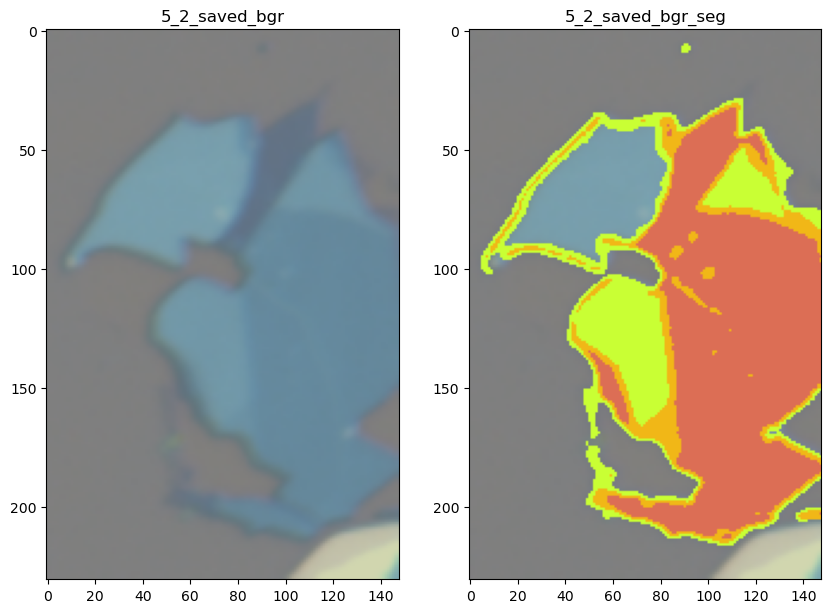

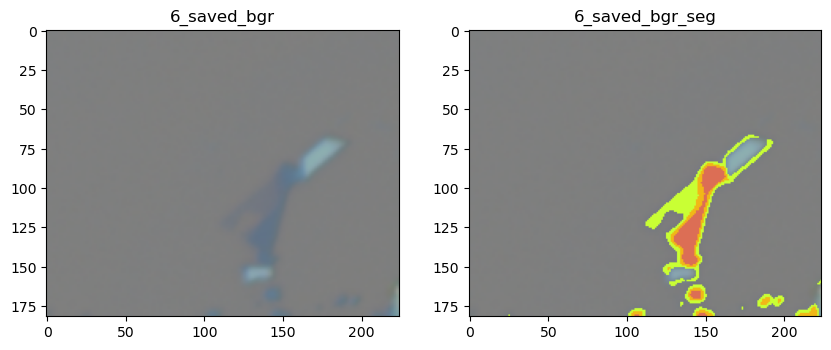

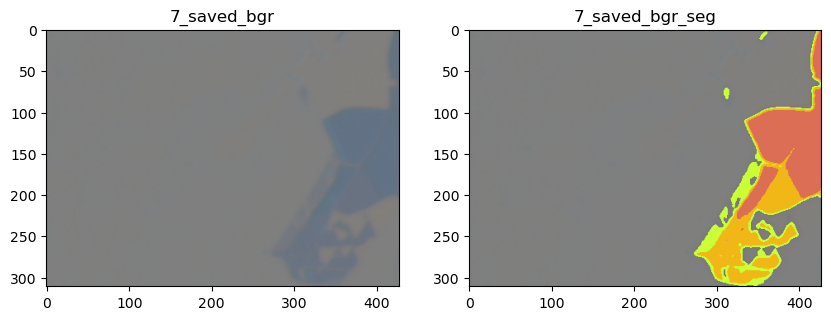

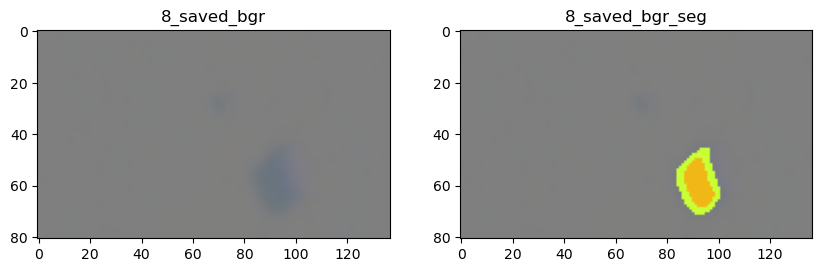

In [23]:
for i in range(len(images)):
    # VISUALIZING THE IMAGE SEGMENTATION
    img_label = images[i].split("\\")[-1].split(".")[0] # Image Label

    # READ IMAGE AND CONVERT IT TO RGB
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # PERFORM SEGMENTATION AND SAVE IMAGE
    img_seg = detect(img)
    save_path = pwd+"/Red/Segmented/"
    cv2.imwrite(save_path+img_label+"_seg.png", cv2.cvtColor(img_seg, cv2.COLOR_RGB2BGR))

    plt.subplots(1, 2, figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(img_label)

    plt.subplot(1, 2, 2)
    plt.imshow(img_seg)
    plt.title(img_label+"_seg")
    plt.show()

In [ ]:
# NEXT STEP IS TO ITERATE THROUGH ALL THE IMAGES AND SEGMENT THEM
# THEN SAVE THEM INTO THE SEGMENTED FOLDER FOR EACH CHANNEL

